In [36]:
import polars as pl
from matplotlib import pyplot as plt
import seaborn as sns

In [1]:
df = pl.read_parquet('hf://datasets/Artificio/WikiArt_Full/data/train-*-of-*.parquet')

In [2]:
df.head()

title,artist,date,genre,style,description,filename,image,embeddings_pca512,resnet50_non_robust_feats,resnet50_robust_feats
str,str,str,str,str,str,str,struct[2],list[f32],list[f32],list[f32]
"""Cornelia Street""","""John French Sloan""","""1920""","""cityscape""","""New Realism""","""John French Sloan / Cornelia S…","""0.jpg""","{b""\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\x09\x09\x08\x0a\x0c\x14\x0d\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c\x20""...,null}","[-37.40168, -87.526672, … -3.483787]","[0.005684, 0.040691, … 0.0]","[0.036405, 0.003961, … 0.056972]"
"""O Diabo, a Paraquedista, Etc""","""Rene Bertholo""","""1997.0""","""figurative""","""Surrealism""","""Rene Bertholo / O Diabo, a Par…","""100000.jpg""","{b""\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\x09\x09\x08\x0a\x0c\x14\x0d\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c\x20""...,null}","[-129.157059, -4.885813, … -6.944144]","[0.186962, 0.013707, … 0.009801]","[0.020595, 0.0, … 0.067612]"
"""Milking the Cow ""","""Yasuo Kuniyoshi""","""1927.0""","""genre painting""","""Expressionism""","""Yasuo Kuniyoshi / Milking the …","""100005.jpg""","{b""\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\x09\x09\x08\x0a\x0c\x14\x0d\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c\x20""...,null}","[-56.470703, 63.528767, … -5.392049]","[0.130323, 0.039052, … 0.002773]","[0.022389, 0.30916, … 0.013742]"
"""Self-portrait""","""Lajos Tihanyi""","""1920.0""","""self-portrait""","""Expressionism""","""Lajos Tihanyi / Self-portrait …","""100061.jpg""","{b""\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\x09\x09\x08\x0a\x0c\x14\x0d\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c\x20""...,null}","[-18.276014, -90.616631, … 1.209977]","[0.05663, 0.027929, … 0.026631]","[0.0, 0.0113, … 0.021567]"
"""All healing""","""Raphael Kirchner""","""None""","""genre painting""","""Art Nouveau (Modern)""","""Raphael Kirchner / All healing…","""100018.jpg""","{b""\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x08\x06\x06\x07\x06\x05\x08\x07\x07\x07\x09\x09\x08\x0a\x0c\x14\x0d\x0c\x0b\x0b\x0c\x19\x12\x13\x0f\x14\x1d\x1a\x1f\x1e\x1d\x1a\x1c\x1c\x20""...,null}","[-45.564873, 133.69252, … 5.461309]","[0.077711, 0.0, … 0.000313]","[0.066902, 0.093021, … 0.040904]"


In [28]:
df.describe()

statistic,title,artist,date,genre,style,description,filename,image,embeddings_pca512,resnet50_non_robust_feats,resnet50_robust_feats
str,str,str,str,str,str,str,str,f64,f64,f64,f64
"""count""","""103250""","""103250""","""103250""","""103250""","""103250""","""103250""","""103250""",103250.0,103250.0,103250.0,103250.0
"""null_count""","""0""","""0""","""0""","""0""","""0""","""0""","""0""",0.0,0.0,0.0,0.0
"""mean""",null,null,null,null,null,null,null,null,null,null,null
"""std""",null,null,null,null,null,null,null,null,null,null,null
"""min""",""" 2 Impressions: Swatch""",""" Architect's visual ""","""1059.0""","""None""","""Abstract Art""",""" Architect's visual / The Sol…","""0.jpg""",null,null,null,null
"""25%""",null,null,null,null,null,null,null,null,null,null,null
"""50%""",null,null,null,null,null,null,null,null,null,null,null
"""75%""",null,null,null,null,null,null,null,null,null,null,null
"""max""","""鬼趣图""","""∞ /detail 868149-893746""","""rver""","""yakusha-e""","""Zen""","""∞ /detail 868149-893746 / 1965…","""99999.jpg""",null,null,null,null


In [32]:
def show_distribution(column):
    counts = df.group_by(column).agg([
        pl.count(column).alias("count")
    ]).sort("count")
    print(f'{column.capitalize()} Count: {len(counts[column])}')
    plt.figure(figsize=(20, 6))
    plt.set_xscale('log')
    plt.bar(counts[column], counts["count"])
    plt.xlabel(column.capitalize())
    plt.ylabel("Count")
    plt.title(f"{column.capitalize()} Distribution")
    plt.xticks(rotation=90)
    plt.show()

Genre Count: 43


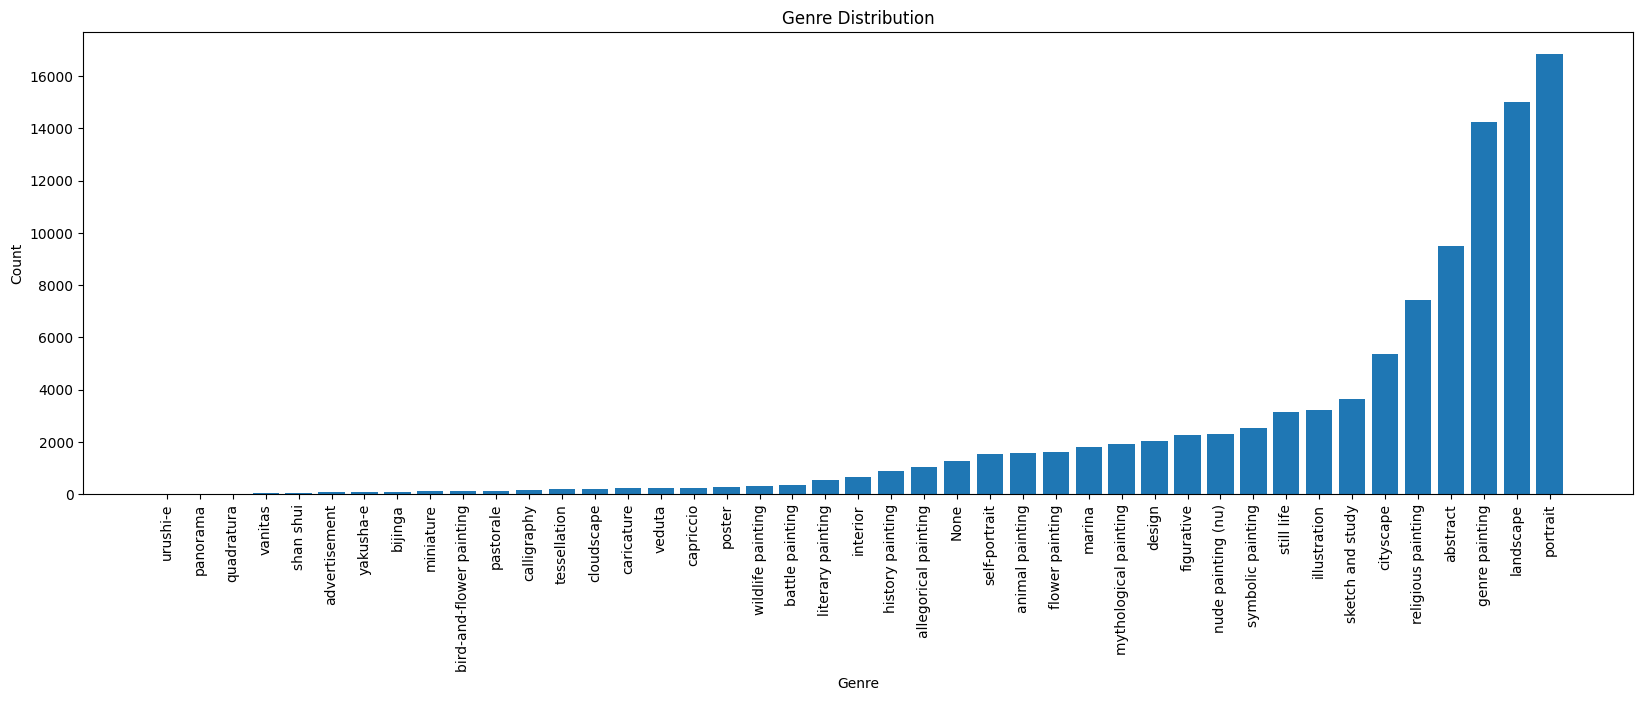

In [33]:
show_distribution('genre')

Style Count: 137


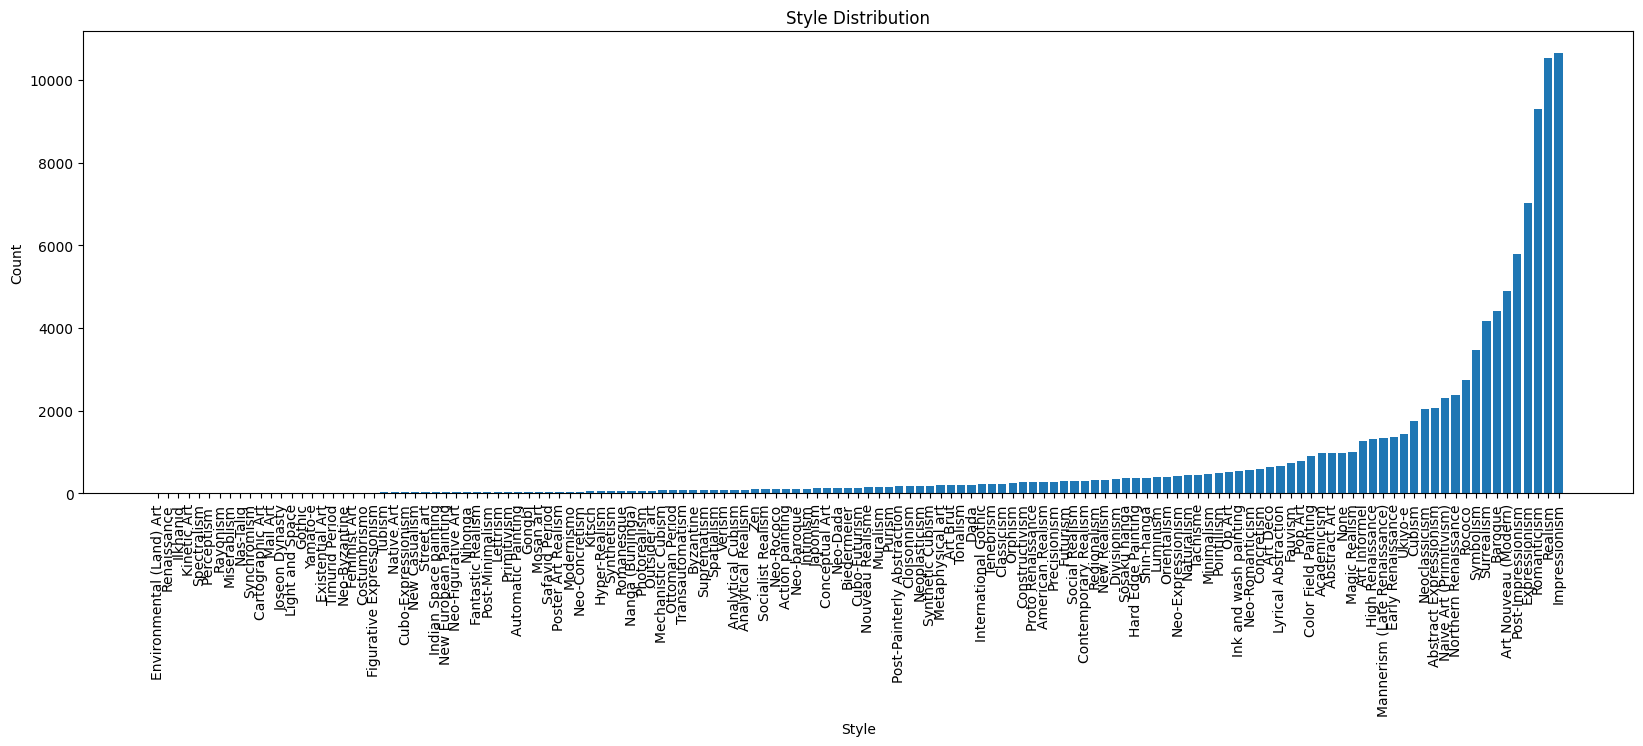

In [34]:
show_distribution('style')

In [24]:
artist_counts = df.group_by("artist").agg([
    pl.count("artist").alias("count")
]).sort("count")

print(f'Artist Count: {len(artist_counts["count"])}')
print(f'Artists with the fewest  artworks')
print(artist_counts.head(5))
print(f'Artists with the most artworks')
print(artist_counts.tail(5))

Artist Count: 2319
Artists with the fewest  artworks
shape: (5, 2)
┌─────────────────────────────────┬───────┐
│ artist                          ┆ count │
│ ---                             ┆ ---   │
│ str                             ┆ u32   │
╞═════════════════════════════════╪═══════╡
│ Papier peint                    ┆ 1     │
│ Quiberon                        ┆ 1     │
│ the Creator, the days of creat… ┆ 1     │
│ Morgat                          ┆ 1     │
│ Cross for You                   ┆ 1     │
└─────────────────────────────────┴───────┘
Artists with the most artworks
shape: (5, 2)
┌───────────────────────┬───────┐
│ artist                ┆ count │
│ ---                   ┆ ---   │
│ str                   ┆ u32   │
╞═══════════════════════╪═══════╡
│ Pierre-Auguste Renoir ┆ 500   │
│ Gustave Dore          ┆ 500   │
│ Ilya Repin            ┆ 500   │
│ Marc Chagall          ┆ 500   │
│ Rembrandt             ┆ 500   │
└───────────────────────┴───────┘


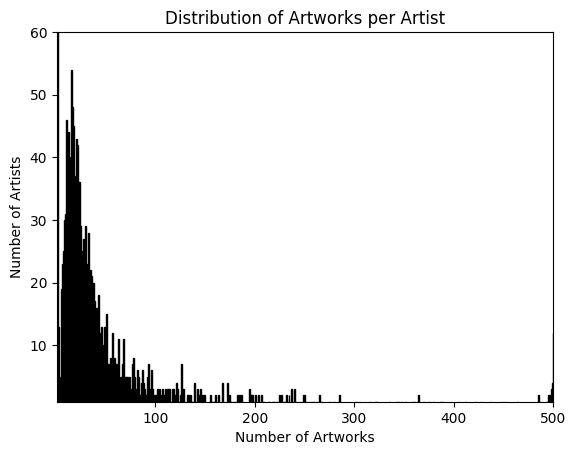

In [25]:
plt.hist(artist_counts["count"], bins=range(1, 502), edgecolor="black")
plt.xlabel("Number of Artworks")
plt.ylabel("Number of Artists")
plt.title("Distribution of Artworks per Artist")
plt.ylim(1, 60)
plt.xlim(1, 500)
plt.show()

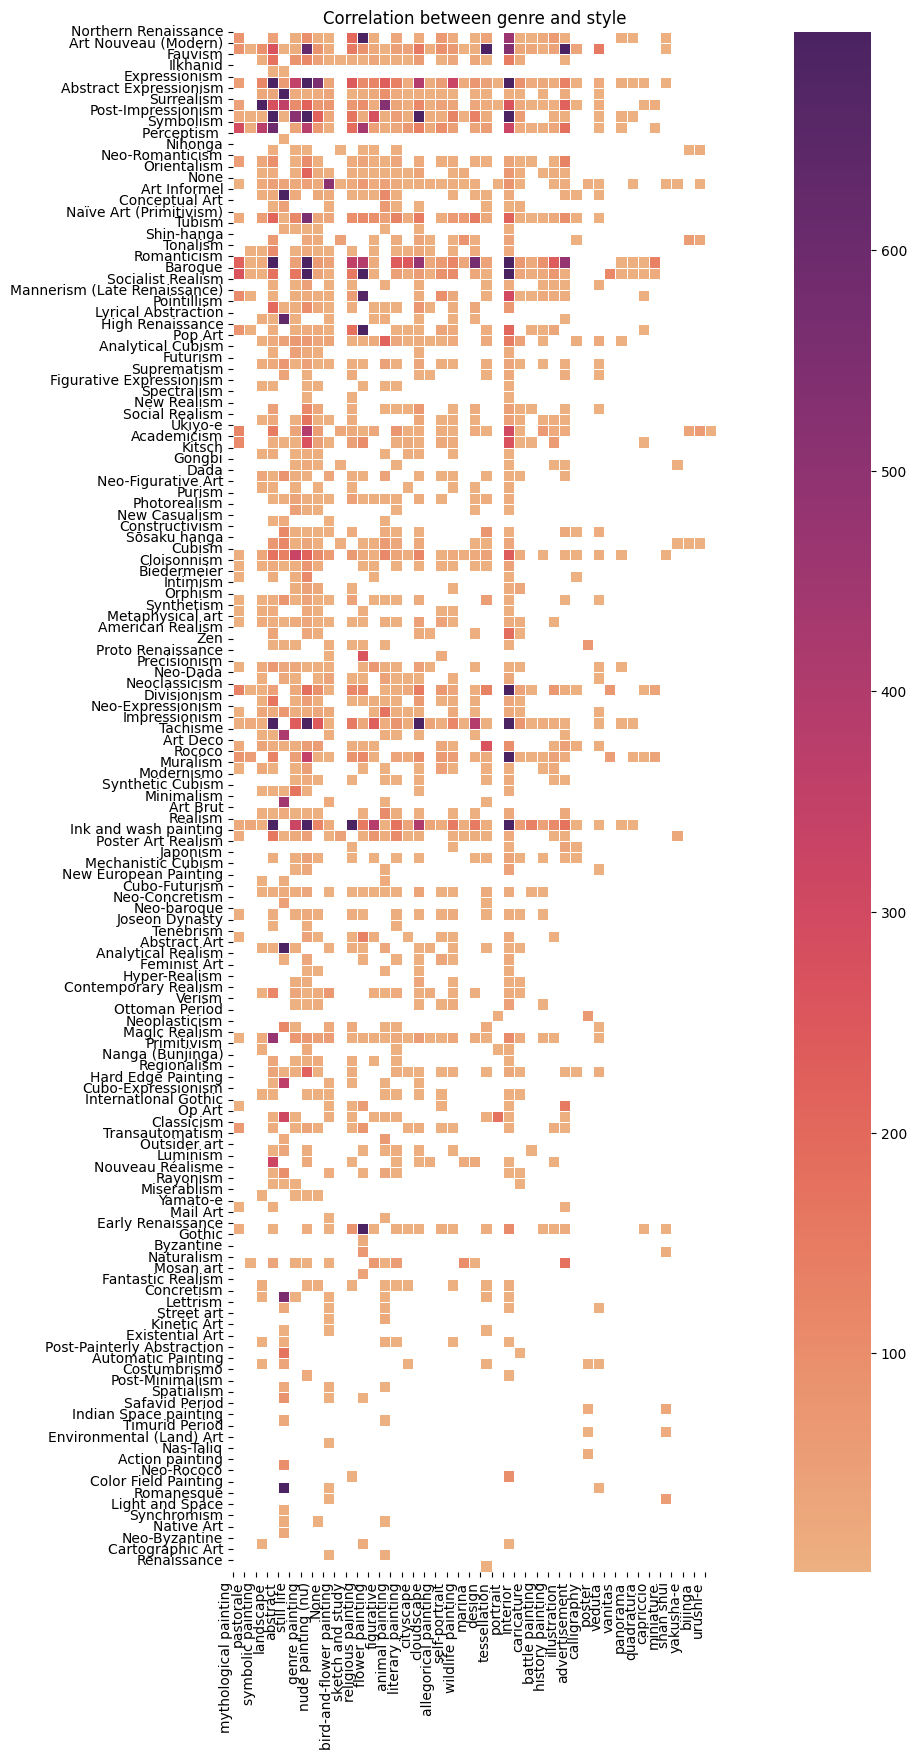

In [83]:
dropped_columns = df.columns
dropped_columns.remove('genre')
dropped_columns.remove('style')
corr_df = df.clone().drop(dropped_columns)

corr_df = corr_df.group_by(['genre', 'style']).agg(pl.col('genre').count().alias('count'))
correlation_matrix = corr_df.pivot(index='style', on='genre', values='count') 
style_names = correlation_matrix.drop_in_place('style')
names = correlation_matrix.columns
masked_matrix = correlation_matrix.clone()
for name in names:
    masked_matrix = masked_matrix.with_columns(
        pl.when(pl.col(name) > 0)
        .then(0)
        .otherwise(1)
        .alias(name)
    )
mask = masked_matrix.to_numpy()
plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, cmap='flare', fmt='', linewidths=.5, square=True, robust=True, mask=mask)
plt.title('Correlation between genre and style')
plt.xticks(ticks=range(len(correlation_matrix.columns)), labels=correlation_matrix.columns, rotation=90, ha='right')
plt.yticks(ticks=range(len(style_names)), labels=style_names)
plt.show()